In [1]:
%matplotlib inline

# 確率的勾配降下法 (Stochastic Gradient Descent)

## 最適化 (optimization)
---
パラメーターを調整して、モデルから正解 $y$ が出力される可能性を高めたり (尤度最大化) 、予測値 $\hat{y}$ と正解 $y$ との差を小さくすること (誤差最小化) 。

誤差 (Error) を求める関数のことをコスト関数 (Cost function) ・損失関数 (Loss function) ・目的関数 (Objective function) などと呼ぶ。(厳密には違う概念を指している場合もある)

## 目的関数の例

### 平均二乗誤差 (Mean Squared Error, MSE)
---
回帰問題の誤差として最も使われる関数。 ([評価指標](metrics.ipynb#%E5%B9%B3%E5%9D%87%E4%BA%8C%E4%B9%97%E8%AA%A4%E5%B7%AE-%28MSE,-Mean-Squared-Error%29)を参照)

$
{\displaystyle MSE=\frac
    {1}
    {n}
\sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}}
$

### エントロピー (Entropy)
---
情報の乱雑さ・不純さを表す指標。決定木で[不純度](decision_tree.ipynb#%E3%82%A8%E3%83%B3%E3%83%88%E3%83%AD%E3%83%94%E3%83%BC)を表すのに使われる。

${\displaystyle Entropy=-\sum ^{c}_{i=1} P_{i} logP_{i}}$

二値分類 $( c=2)$ の場合、 $P_{1} =P_{2} =0.5$ でエントロピーが最大になる。

### クロスエントロピー (Cross-entropy)
---
分類問題を確率回帰の問題として解く場合によく用いられる損失関数。 ([ロジスティック回帰](logistic_regression.ipynb#%E6%9C%80%E5%B0%A4%E6%B3%95-%28Maximum-Likelihood-Method%29)を参照)

$
{\displaystyle CrossEntropy=-\sum ^{n}_{i=1}\left[ y_{i} log\left(\hat{y}_{i}\right) +( 1-y_{i}) log\left( 1-\hat{y}_{i}\right)\right]}
$

予測値が正解に近いと誤差が 0 に、遠いと誤差が無限大に近づいていく。

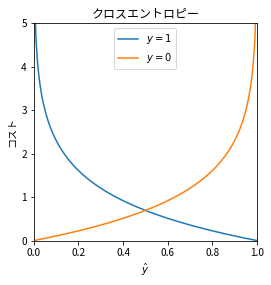

In [2]:
from my_functions.sgd import cross_entropy
cross_entropy.show()

## 勾配降下法 (gradient descent)
---
損失関数 $L$ をパラメータ $\theta$ についての関数 $L(\theta )$ とみなして $L(\theta)$ の勾配を下っていく ( $L(\theta )$ の傾きと逆に進む) ことでコスト関数を最小化する手法。

最急降下法やバッチ勾配降下法ともいう。

### 線形回帰 + 平均二乗誤差の例
---
バイアス項を省略した線形回帰を二乗誤差関数で学習させた場合

$
\begin{align}
    E( w) & =\frac
        {1}
        {2n}
    \sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}\\
     & =\frac
         {1}
         {2n}
     \sum ^{n}_{i=1}( y_{i} -wx_{i})^{2}\\
     & =\frac
         {1}
         {2n}
     \left(\sum ^{n}_{i=1} x^{2}_{i} w^{2} -2\sum ^{n}_{i=1} x_{i} y_{i} w+\sum ^{n}_{i=1} y^{2}_{i}\right)
\end{align}
$

となる。これをパラメーター $w$ について微分した $
{\displaystyle \frac
    {dE( w)}
    {dw}
=\frac
    {1}
    {n}
\left(\sum ^{n}_{i=1} x^{2}_{i} w-\sum ^{n}_{i=1} x_{i} y_{i}\right)}
$ によって勾配を求める。

In [3]:
from my_functions.sgd import gradient_descent_1d
gradient_descent_1d.show()

Output()

In [4]:
# 3Dグラフの表示に必要
%matplotlib widget
%matplotlib widget

In [5]:
from my_functions.sgd import gradient_descent_2d
gradient_descent_2d.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Output()

### 学習率 (learning rate)
---
勾配の情報から、1ステップ (パラメーターの更新) でどの程度進むかは学習率というハイパーパラメーターで調整する。

学習率は大きすぎると発散し、小さすぎると現実的な時間内に収束しない。

In [6]:
# 通常表示に戻す
%matplotlib inline

In [7]:
from my_functions.sgd import learning_rate
learning_rate.show()

interactive(children=(FloatLogSlider(value=0.01, continuous_update=False, description='学習率', max=0.5, min=-2.0…

## 確率的勾配降下法 (Stochastic Gradient Descent)
---
ステップ (1回のパラメーター更新) ごとに一部のサンプルだけを使用して勾配を計算する手法。最急降下法は問題が多いため、実際には最急降下法を改良した確率的勾配降下法を使用する。

厳密には1ステップで1サンプルだけ使用するものが確率的勾配降下法、2以上のサンプルを使用するものがミニバッチ確率的勾配降下法だが、勾配降下法や確率的勾配降下法というときには通常ミニバッチ確率的勾配降下法を指す。

### 収束時間
---
確率的勾配降下法は、毎回のパラメーター更新で必ずしも最適解に向かうことを保証しないが、全体としてみれば (例えば全ステップ中7割くらいは最適解に近づくというように) 確率的に最適解の方向へ向かって収束していく。また、最適解へ向かって一直線にパラメーターを更新していかないので一見非効率そうだが、毎回の計算コストが小さいため、バッチ勾配降下法と比べて時間的に**早く収束**する。

最急降下法は (少なくとも局所) 最適解への収束を保証するが、確率的勾配降下法は最適解に収束してそこにとどまることはなく、最適解の周辺をうろつくことになる。実用上は、この**ある程度収束した値を最適解として扱って問題ない**。

確率的勾配降下法の通常の実装は以下の通り

- 最初にデータをシャッフルして順番に利用
 - 毎回データセットからランダムにデータを選ぶのではない
 - データを学習する回数に偏りが生じないようにするため
- エポック (全データを1回学習する) ごとにシャッフル
 - データの並びによる偏りが生じないようにするため

<table class="border text-center">
    <tr class="background-default">
        <td class="border-none" colspan="2"></td>
        <td class="border-none" colspan="3">シャッフル</td>
    </tr>
    <tr>
        <th class="border-bottom border-right-bold background-dark" rowspan="3">epoch 1</th>
        <th class="border-bottom background-dark">step 1</th>
        <td style="background-color: red;">サンプル2</td>
        <td class="background-bright">サンプル3</td>
        <td class="background-bright">サンプル1</td>
    </tr>
    <tr>
        <th class="border-bottom background-dark">step 2</th>
        <td class="background-bright">サンプル2</td>
        <td style="background-color: red;">サンプル3</td>
        <td class="background-bright">サンプル1</td>
    </tr>
    <tr>
        <th class="border-bottom background-dark">step 3</th>
        <td class="background-bright">サンプル2</td>
        <td class="background-bright">サンプル3</td>
        <td style="background-color: red;">サンプル1</td>
    </tr>
    <tr class="border-none background-default">
        <td class="border none" colspan="2"></td>
        <td colspan="3">シャッフル</td>
    </tr>
    <tr>
        <th class="border-bottom border-right-bold background-dark" rowspan="3">epoch 2</th>
        <th class="border-bottom background-dark">step 4</th>
        <td style="background-color: red;">サンプル3</td>
        <td class="background-bright">サンプル2</td>
        <td class="background-bright">サンプル1</td>
    </tr>
    <tr>
        <th class="border-bottom background-dark">step 5</th>
        <td class="background-bright">サンプル3</td>
        <td style="background-color: red;">サンプル2</td>
        <td class="background-bright">サンプル1</td>
    </tr>
    <tr>
        <th class="border-bottom background-dark">step 6</th>
        <td class="background-bright">サンプル3</td>
        <td class="background-bright">サンプル2</td>
        <td style="background-color: red;">サンプル1</td>
    </tr>
</table>

In [8]:
from my_functions.sgd import comparison
comparison.show()

Output()

## 推薦図書
---
- [Python 機械学習プログラミング 達人データサイエンティストによる理論と実践](https://www.amazon.co.jp/Python-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0-%E9%81%94%E4%BA%BA%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%83%86%E3%82%A3%E3%82%B9%E3%83%88%E3%81%AB%E3%82%88%E3%82%8B%E7%90%86%E8%AB%96%E3%81%A8%E5%AE%9F%E8%B7%B5-impress-gear/dp/4295003379/)